# Training cat or not classification task with Micrograd-Vectorized Engine

With this engine we can create model similar to Pytorch with Relu and other activation function with Binary cross entropy loss function.

In [22]:
import numpy as np
import h5py

from engine.micrograd import *
from model import Mymodel
from engine.nn import *

## 1. Define a model like we do in Pytorch and define forward pass

In [23]:
class Mymodel():
    def __init__(self, layer_dims=[3,5,3,1]):
        self.l1 = Linear(layer_dims[0], layer_dims[1])
        self.l2 = Linear(layer_dims[1], layer_dims[2])
        self.l3 = Linear(layer_dims[2], layer_dims[3])
        self.l4 = Linear(layer_dims[3], layer_dims[4])
        self.params = [self.l1.W, self.l1.b, self.l2.W, self.l2.b, self.l3.W, self.l3.b, self.l4.W, self.l4.b]

    def forward(self, X):
        o1 = self.l1(X).ReLU()
        o2 = self.l2(o1).ReLU()
        o3 = self.l3(o2).ReLU()
        o4 = self.l4(o3).Sigmoid()

        return o4

    def optimize(self, lr=0.01):
        for param in self.params:
            param.data = param.data - (param.grad*lr)
        # zero grad after updation
        for param in self.params:
            param.grad[:] = 0
            
    def __call__(self, X):
        return self.forward(X)

## 2. Load dataset and preprocess to pass it to model

In [24]:
def load_dataset():
    train_dataset = h5py.File('./dataset/train_catvnoncat.h5', 'r')
    test_dataset = h5py.File('./dataset/test_catvnoncat.h5', 'r')

    X_train = np.array(train_dataset['train_set_x'])
    Y_train = np.array(train_dataset['train_set_y']).reshape(1,-1)


    X_test = np.array(test_dataset['test_set_x'])
    Y_test = np.array(test_dataset['test_set_y']).reshape(1,-1)

    return X_train, Y_train, X_test, Y_test

X, Y, X_test, Y_test = load_dataset()

print("Train X ", X.shape)
print("Train Y ", Y.shape)
print("Test X ", X_test.shape)
print("Test Y ", Y_test.shape)

X_train = X.reshape(-1, X.shape[1]*X.shape[2]*X.shape[3]).T  # (m, w, h, rgb) -> (nx, m) 
X_train = X_train/255.
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2]*X_test.shape[3]).T  # (m, w, h, rgb) -> (nx, m) 
X_test = X_test/255.

Train X  (209, 64, 64, 3)
Train Y  (1, 209)
Test X  (50, 64, 64, 3)
Test Y  (1, 50)


## 3. Define no of layers and nodes in it. And initialize network

In [26]:
# print(X_train.shape)
nx = X_train.shape[0]

layer_dims = np.array([nx, 20, 7, 5, 1]) # four layer neural network with no of units in each layer

np.random.seed(1)
model = Mymodel(layer_dims)

## 4. Train the model

In [27]:
lr = 0.0075
for i in range(3000):
    yh = model(X_train)
    loss = Value.BCE(Y, yh)
    loss.backward()
    model.optimize(lr)
    
    if (i % 100 == 0 or i == 3000 - 1):
        print("Cost after iteration {}: {}".format(i, loss.data))
    del loss, yh


Cost after iteration 0: 0.7212989330291748
Cost after iteration 100: 0.1901063621044159
Cost after iteration 200: 0.06146736815571785
Cost after iteration 300: 0.0423864871263504
Cost after iteration 400: 0.032910268753767014
Cost after iteration 500: 0.02702365629374981
Cost after iteration 600: 0.022942684590816498
Cost after iteration 700: 0.019920112565159798
Cost after iteration 800: 0.017583100125193596
Cost after iteration 900: 0.015720386058092117
Cost after iteration 1000: 0.014201183803379536
Cost after iteration 1100: 0.012939265929162502
Cost after iteration 1200: 0.011875187046825886
Cost after iteration 1300: 0.010966508649289608
Cost after iteration 1400: 0.010182066820561886
Cost after iteration 1500: 0.009498443454504013
Cost after iteration 1600: 0.008897741325199604
Cost after iteration 1700: 0.008365985937416553
Cost after iteration 1800: 0.007892169058322906
Cost after iteration 1900: 0.007467497140169144
Cost after iteration 2000: 0.007084803190082312
Cost after i

## 5. Visualize predictions by our model

In [8]:
preds = model(X_train)

In [10]:
import matplotlib.pyplot as plt

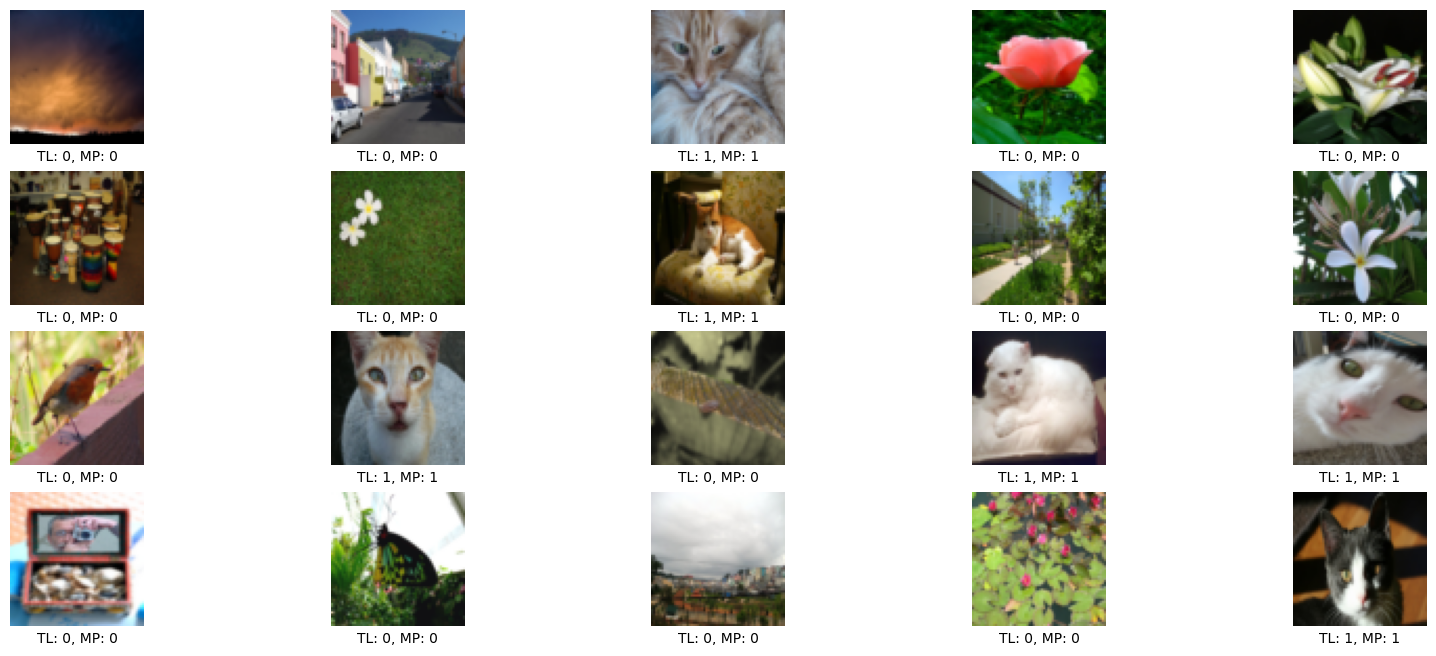

In [36]:
nc = 5
# True Label TL vs Model Predicted Label MP
fig, axes = plt.subplots(nrows=4, ncols=nc, figsize=(20,8))
for i, ax in enumerate(axes.flat):
    p = 1 if preds.data[0][i] > 0.5 else 0
    ax.imshow(X[i])
    ax.text(0.5, -0.15, f'TL: {str(Y[0][i])}, MP: {p}', transform=ax.transAxes, ha='center', va='bottom')
    ax.axis('off')
